   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.1

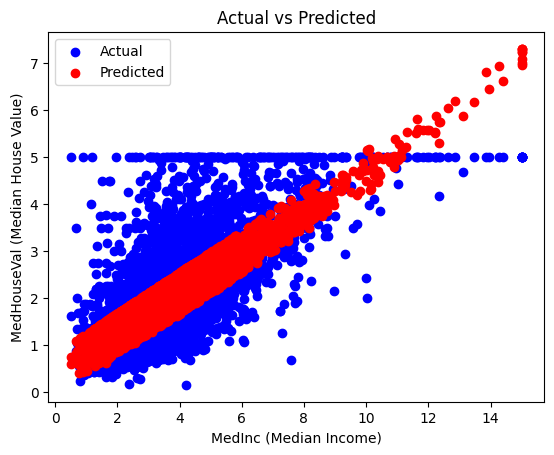

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

# Load California housing dataset
dataset = fetch_california_housing(as_frame=True)
data = dataset.frame

# View the first few rows
print(data.head())

# Check missing values
print(data.isnull().sum())

# Fill or drop missing values if any
data = data.dropna()

# View the dataset again
print(data.head())

# Select Features and Target
X = data[['MedInc', 'HouseAge']]   # input features
y = data['MedHouseVal']             # target value

# Split into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on Test Data
y_pred = model.predict(X_test)

# Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# Coefficients and Intercept
print("\nModel Coefficients:")
print(f"MedInc Coefficient: {model.coef_[0]}")
print(f"HouseAge Coefficient: {model.coef_[1]}")
print(f"Intercept: {model.intercept_}")

# Plotting (for simple view - only one feature plotted)
plt.scatter(X_test['MedInc'], y_test, color='blue', label='Actual')
plt.scatter(X_test['MedInc'], y_pred, color='red', label='Predicted')
plt.xlabel('MedInc (Median Income)')
plt.ylabel('MedHouseVal (Median House Value)')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()
